___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [ ]:
import numpy as np                         # kütüphaneleri import ettim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [ ]:
df= pd.read_csv("/content/Mall_Customers.csv")     # datayı okuttum
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Explore Data

You can rename columns to more usable, if you need.

In [ ]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)  # sütun isimlerini daha kullanışlı hale getirdim

In [ ]:
df.drop(columns=["CustomerID"],axis=1,inplace = True)      # model analizinde kullanmayacağım sütunu drop ettim

In [ ]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

In [ ]:
df.Gender.replace("Male",0,inplace=True)               # genderları nümerikleştirdim
df.Gender.replace("Female",1,inplace=True)

In [ ]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual_Income   200 non-null    int64
 3   Spending_Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [ ]:
df.shape

(200, 4)

In [ ]:
df.duplicated().sum()          # duplicate veri var mı diye kontrol ettim

0

In [ ]:
df.isnull().sum()        # null veri var mı diye baktım

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





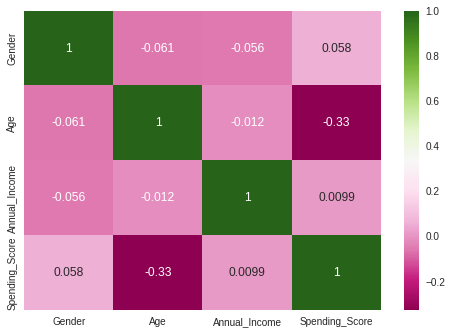

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='PiYG')                 # korelasyon durumuna heaqtmap ile baktım
plt.show()

In [ ]:
df.groupby("Gender")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0
1,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0


In [ ]:
df.groupby("Gender")["Annual_Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0
1,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


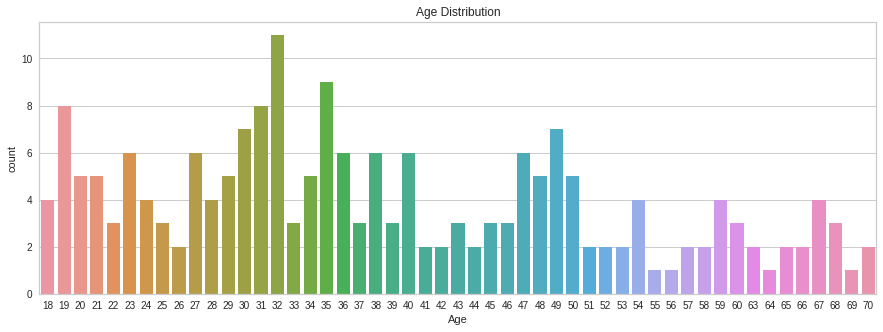

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


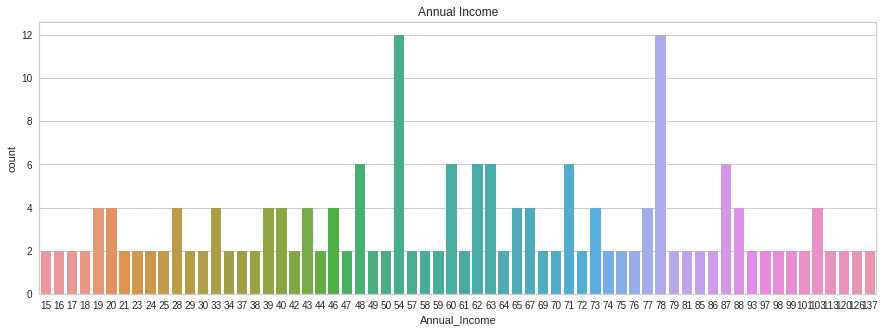

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df['Annual_Income'])
plt.title('Annual Income');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

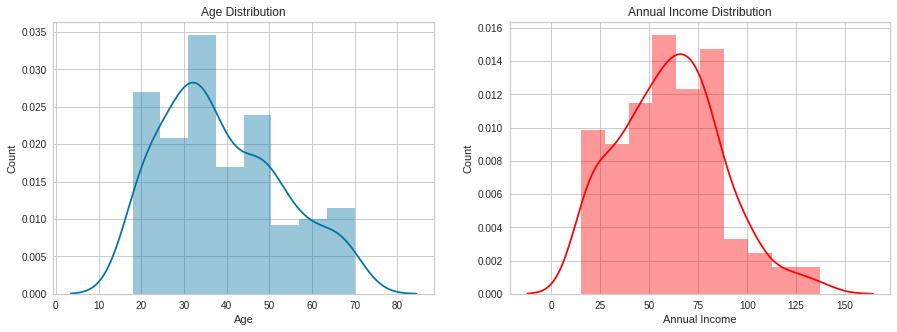

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(df['Annual_Income'],color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

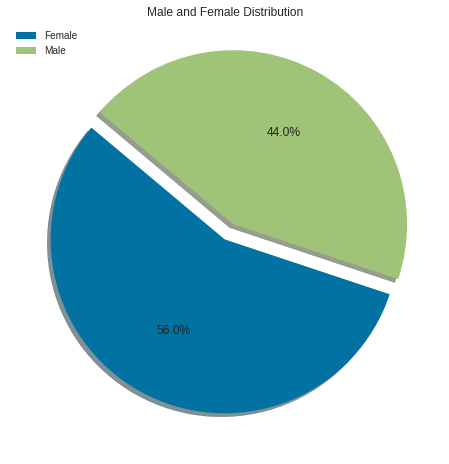

In [ ]:
plt.figure(figsize=(8,8))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


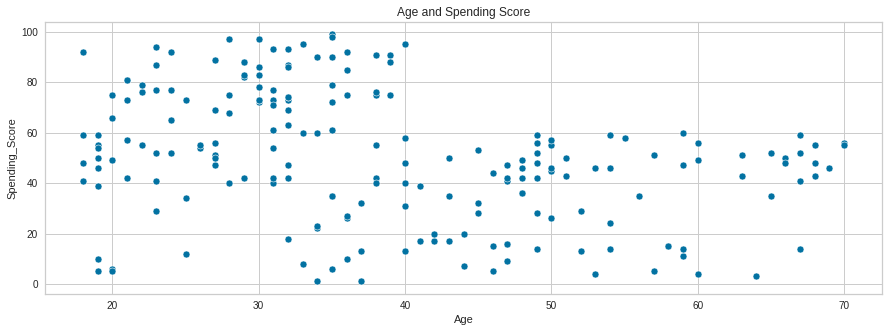

In [ ]:
plt.figure(figsize=(15,5))                            # yaş ile harcama miktarı arasındaki ilişkiyi inceledim
sns.scatterplot(df['Age'], df['Spending_Score'])
plt.title('Age and Spending Score')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


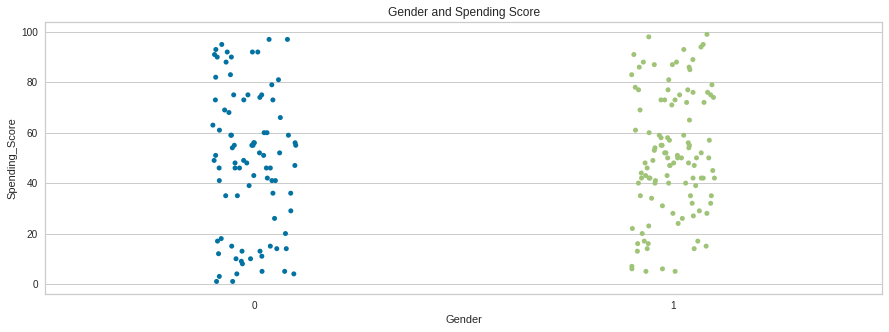

In [ ]:
plt.figure(figsize=(15,5))                                     # cinsiyet ile harcama miktarı arasındaki ilişkiyi inceledim
sns.stripplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler

In [ ]:
# pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyclustertend import hopkins

In [ ]:
df

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [ ]:
hopkins(df, df.shape[0]) 

0.30823175496085486

In [ ]:
df[["Age",'Spending_Score']]

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [ ]:
X = df[["Age",'Spending_Score']]

In [ ]:
hopkins(X, X.shape[0])   #0.5 den düşük olmalı

0.31218655471932144

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ssd = [] # sum of squared distance
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

In [ ]:
ssd

[189.38749033992428,
 124.32628617921532,
 89.76521676586151,
 71.24407583828105,
 53.128438356294026,
 45.907104565678495,
 39.1924193375896,
 33.96106090559104]

Text(0.5, 1.0, 'elbow method')

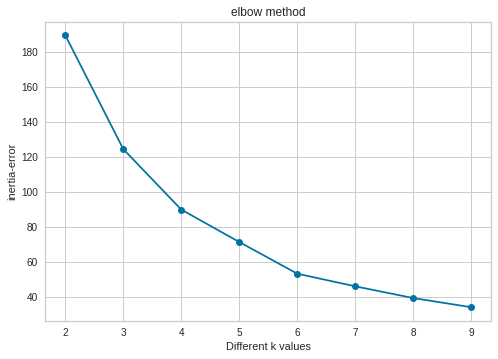

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

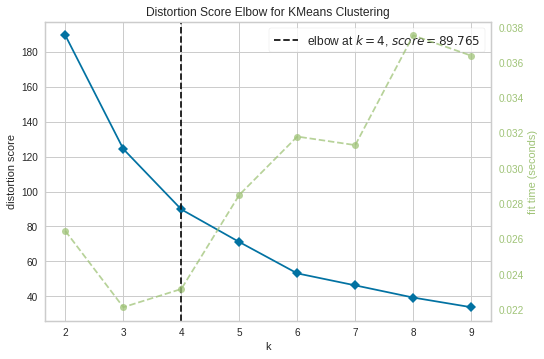

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.labels_)

0.4296615816092418

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.42369111306686563
For n_clusters=6, the silhouette score is 0.4566283030197353
For n_clusters=7, the silhouette score is 0.4114882432090666
For n_clusters=8, the silhouette score is 0.41807241036672366


#### *ii. Determine optimal number of clusters*

In [ ]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [ ]:
model.inertia_

89.76521676586151

In [ ]:
df["cluster"] = model.labels_

In [ ]:
df.head()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


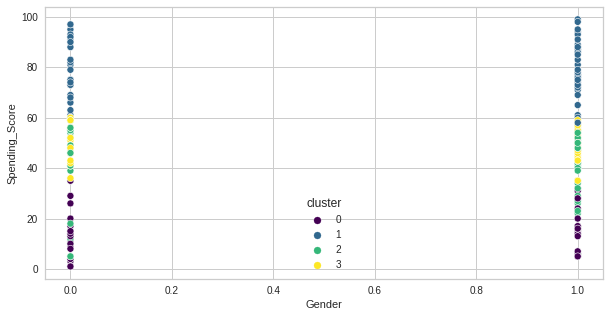

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Gender"], 
                df["Spending_Score"], hue= df.cluster,palette= "viridis");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


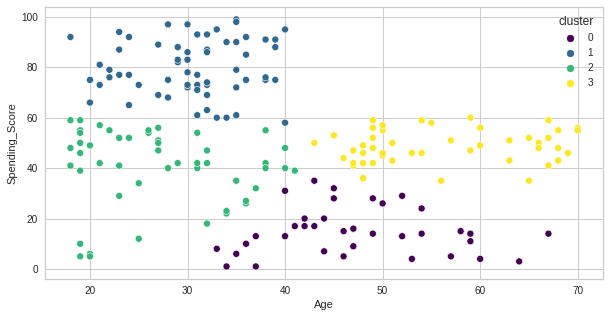

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Age"], 
                df["Spending_Score"], hue= df.cluster,palette= "viridis");

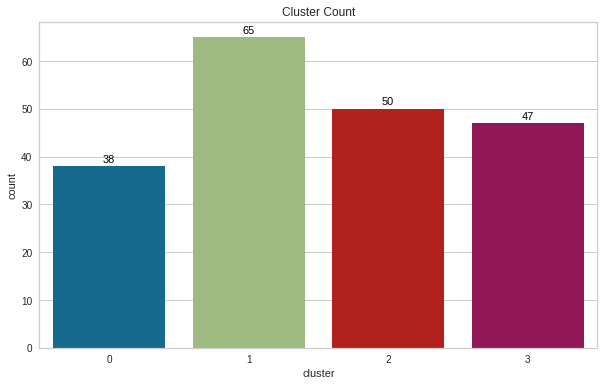

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster)
for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',ha='center',  va='center', 
        fontsize=11, color='black',xytext=(0,7), 
        textcoords='offset points',
        clip_on=True)
plt.show();

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
X = df[["Annual_Income",'Spending_Score']]

In [ ]:
hopkins(X, X.shape[0])   #0.5 den düşük olmalı

0.30498058173355674

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
ssd = [] # sum of squared distance
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

In [ ]:
ssd

[269.1425070447922,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.37581558455637,
 44.91271612308711,
 37.182925370178495,
 32.39226763033117]

Text(0.5, 1.0, 'elbow method')

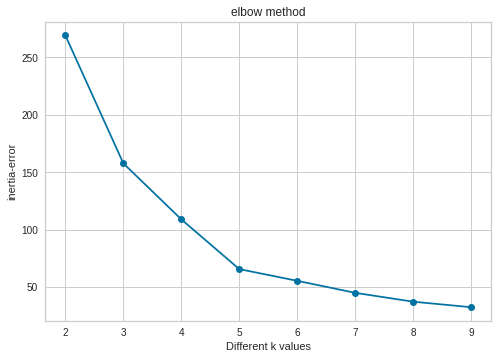

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

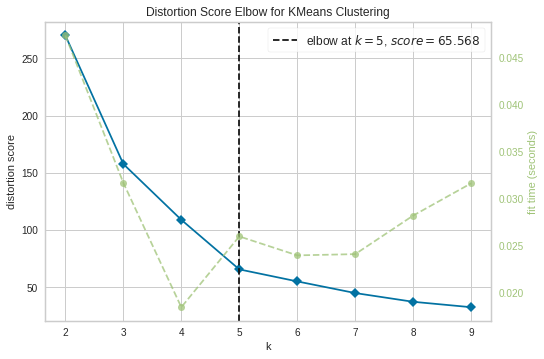

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.labels_)

0.4566624374485964

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3093014040985521
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5377141165734254
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.45543473014577757


#### *ii. Determine optimal number of clusters*

In [ ]:
model = KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [ ]:
model.inertia_

65.56840815571681

In [ ]:
df["cluster"] = model.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


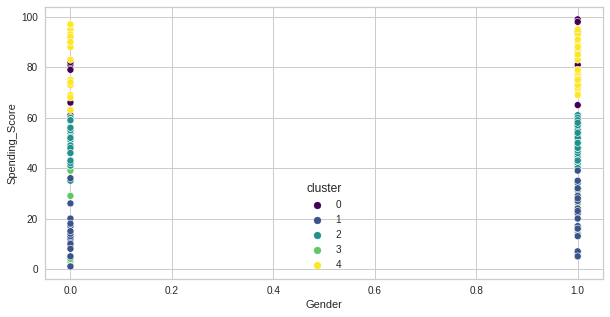

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Gender"], 
                df["Spending_Score"], hue= df.cluster,palette= "viridis");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


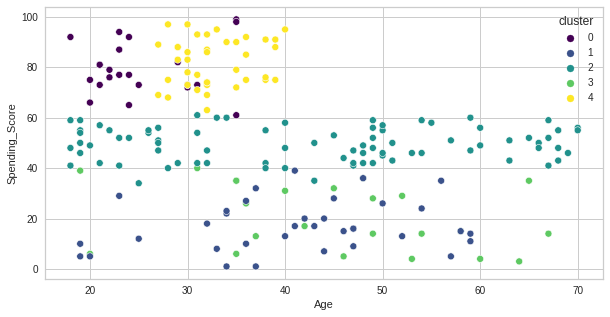

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Age"], 
                df["Spending_Score"], hue= df.cluster,palette= "viridis");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


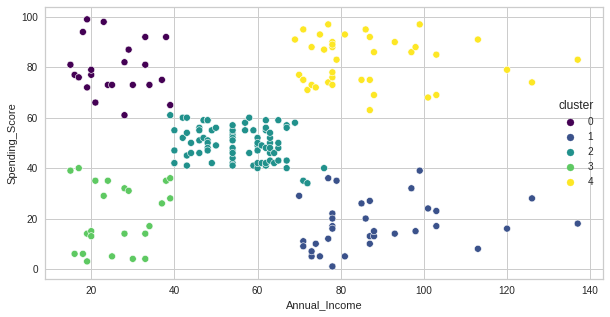

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Annual_Income"], 
                df["Spending_Score"], hue= df.cluster,palette= "viridis");

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
X1 = df[["Age",'Spending_Score']]

In [ ]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

### Dendogram

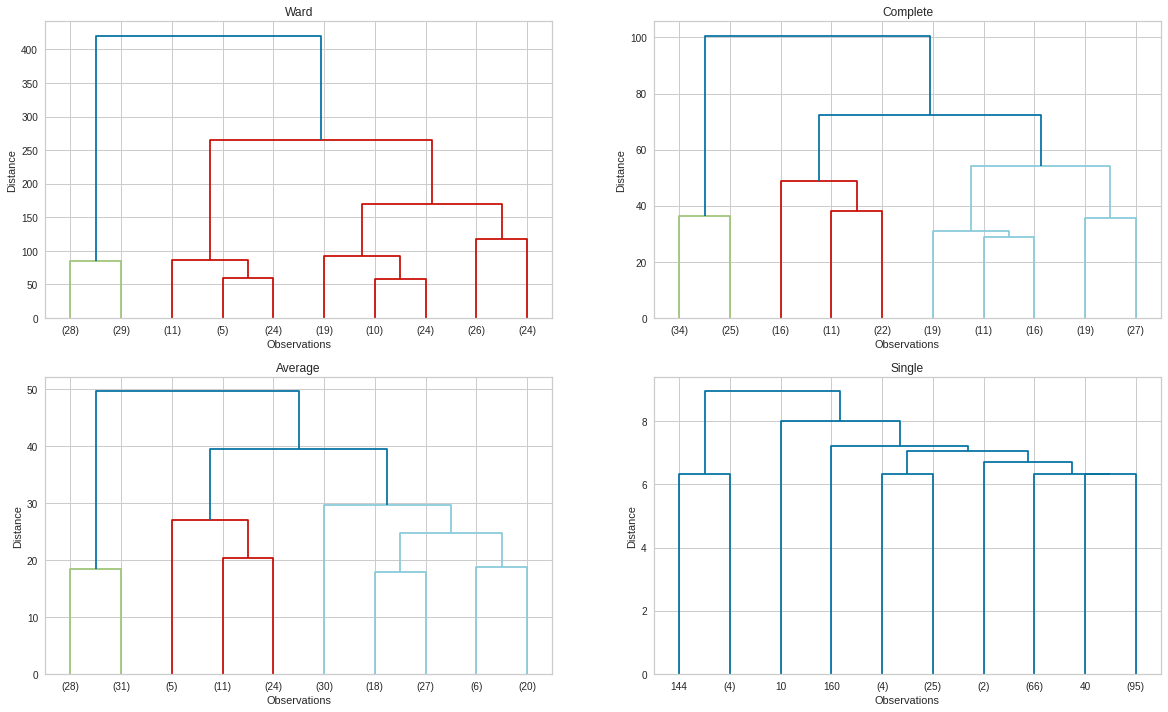

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### Model Building and label visualisation

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model1 = AgglomerativeClustering(n_clusters=3,affinity = "euclidean", linkage = "ward")
model1.fit_predict(X1)

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1])

In [ ]:
df["cluster_1"] = model1.labels_

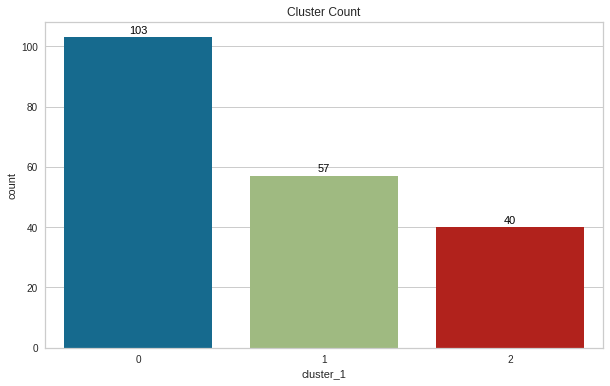

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster_1)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                  
    )
plt.show();

## Clustering based on Annual Income and Spending Score- x2

In [ ]:
K = range(2,10)

for k in K:
    model1 = AgglomerativeClustering(n_clusters = k)
    model1.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model1.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [ ]:
X1 = df[["Age",'Spending_Score']]

In [ ]:
K = range(2,10)

for k in K:
    model1 = AgglomerativeClustering(n_clusters = k)
    model1.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model1.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


In [ ]:
X1 = df[["Age",'Spending_Score']]

In [ ]:
model1 = AgglomerativeClustering(n_clusters=3,affinity = "euclidean", linkage = "ward")
model1.fit_predict(X1)

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1])

#### Annual Income and Spending Score- x2

In [ ]:
X2 = df[["Annual_Income",'Spending_Score']]

In [ ]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

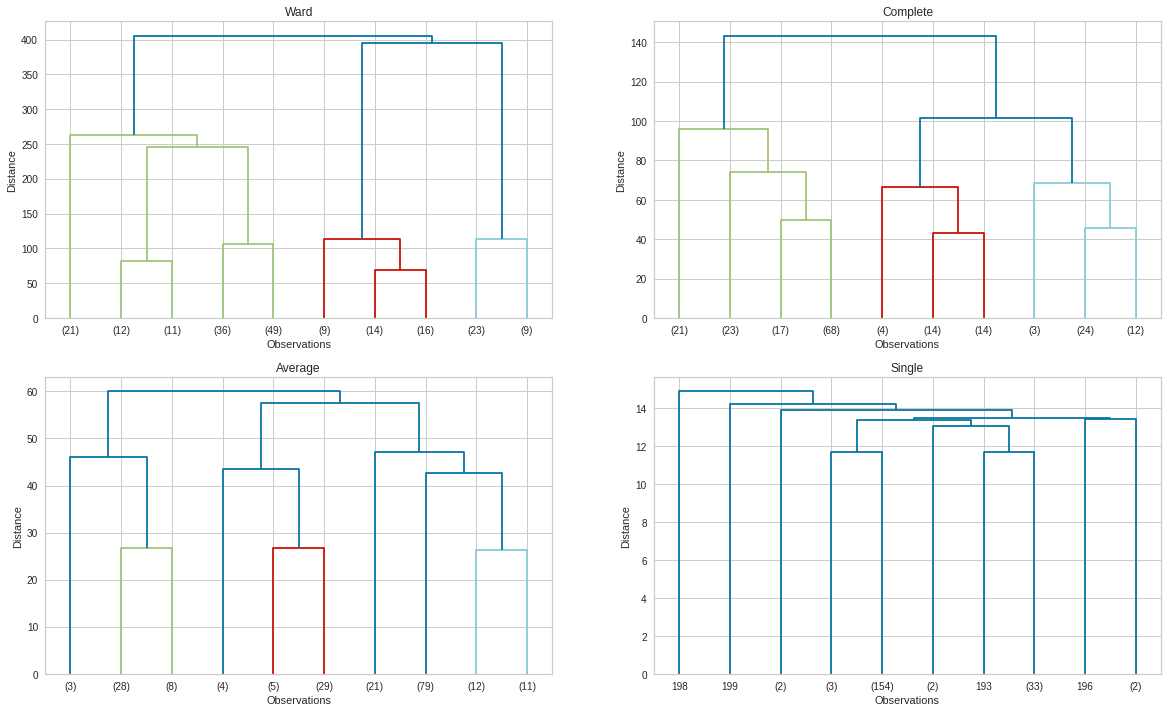

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [ ]:
K = range(2,10)

for k in K:
    model2 = AgglomerativeClustering(n_clusters = k)
    model2.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model2.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


In [ ]:
model2 = AgglomerativeClustering(n_clusters=5,affinity = "euclidean", linkage = "ward")
model2.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [ ]:
 model1.labels_

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1])

In [ ]:
df["cluster_1"] = model1.labels_

In [ ]:
df

,Gender,Age,Annual_Income,Spending_Score,cluster,cluster_1
0,0,19,15,39,3,0
1,0,21,15,81,0,1
2,1,20,16,6,3,2
3,1,23,16,77,0,1
4,1,31,17,40,3,0
...,...,...,...,...,...,...
195,1,35,120,79,4,1
196,1,45,126,28,1,0
197,0,32,126,74,4,1
198,0,32,137,18,1,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


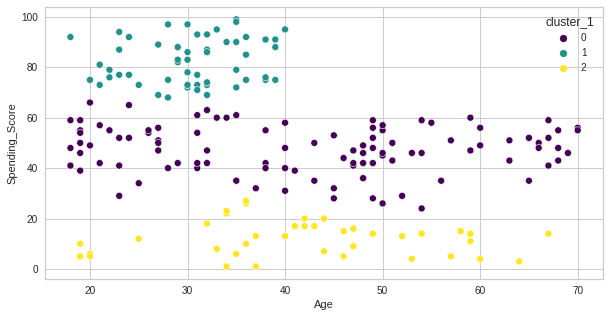

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Age"], 
                df["Spending_Score"], hue= df.cluster_1,palette= "viridis");

#### Annual Income and Spending Score- x2

In [ ]:
df["cluster_2"] = model2.labels_
df

,Gender,Age,Annual_Income,Spending_Score,cluster,cluster_1,cluster_2
0,0,19,15,39,3,0,4
1,0,21,15,81,0,1,3
2,1,20,16,6,3,2,4
3,1,23,16,77,0,1,3
4,1,31,17,40,3,0,4
...,...,...,...,...,...,...,...
195,1,35,120,79,4,1,2
196,1,45,126,28,1,0,0
197,0,32,126,74,4,1,2
198,0,32,137,18,1,2,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


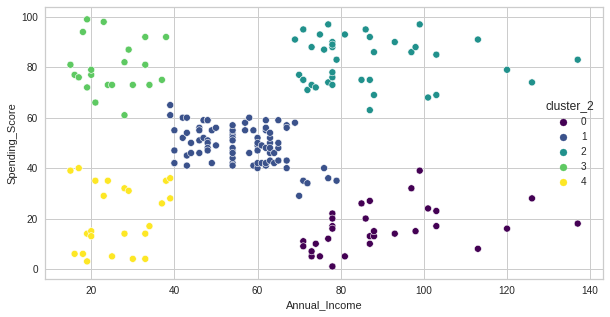

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Annual_Income"], 
                df["Spending_Score"], hue= df.cluster_2,palette= "viridis");

#### Interpretation based on Age and Spending Score- x1

In [ ]:
df.describe()

,Gender,Age,Annual_Income,Spending_Score,cluster,cluster_1,cluster_2
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000,2.110000,0.685000,1.590000
std,0.497633,13.969007,26.264721,25.823522,1.226958,0.786682,1.212125
min,0.000000,18.000000,15.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,28.750000,41.500000,34.750000,1.000000,0.000000,1.000000
50%,1.000000,36.000000,61.500000,50.000000,2.000000,0.000000,1.000000
75%,1.000000,49.000000,78.000000,73.000000,3.000000,1.000000,2.000000
max,1.000000,70.000000,137.000000,99.000000,4.000000,2.000000,4.000000


In [ ]:
df.groupby("cluster_1").mean()

,Gender,Age,Annual_Income,Spending_Score,cluster,cluster_2
cluster_1,,,,,,
0,0.592233,42.174757,54.961165,47.135922,1.980583,1.291262
1,0.578947,30.175439,66.070175,82.350877,2.666667,2.333333
2,0.450000,42.650000,67.125000,12.275000,1.650000,1.300000


### Conclusion

**cluster 0** : The average age is around 42, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 30, both the annula_income and the spending_scores are above average. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it. 


**cluster 2** :The average age is around 43. The annula_income is high and spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.
  


#### Interpretation based on Annual Income and Spending Score- x2

In [ ]:
df.describe()

,Gender,Age,Annual_Income,Spending_Score,cluster,cluster_1,cluster_2
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000,2.110000,0.685000,1.590000
std,0.497633,13.969007,26.264721,25.823522,1.226958,0.786682,1.212125
min,0.000000,18.000000,15.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,28.750000,41.500000,34.750000,1.000000,0.000000,1.000000
50%,1.000000,36.000000,61.500000,50.000000,2.000000,0.000000,1.000000
75%,1.000000,49.000000,78.000000,73.000000,3.000000,1.000000,2.000000
max,1.000000,70.000000,137.000000,99.000000,4.000000,2.000000,4.000000


In [ ]:
df.groupby(["cluster_2","Gender"]).mean()

Age  Annual_Income  Spending_Score   cluster  \
cluster_2 Gender                                                       
0         0       38.833333      86.388889       11.666667  1.000000   
          1       43.785714      93.285714       20.642857  1.000000   
1         0       45.441176      55.852941       49.852941  1.970588   
          1       40.509804      55.784314       48.647059  1.921569   
2         0       33.277778      87.111111       82.666667  4.000000   
          1       32.190476      86.047619       81.666667  4.000000   
3         0       25.000000      25.777778       77.666667  0.000000   
          1       25.583333      24.583333       81.833333  0.000000   
4         0       48.333333      24.666667       19.666667  3.000000   
          1       43.214286      27.357143       21.714286  3.000000   

                  cluster_1  
cluster_2 Gender             
0         0        1.888889  
          1        1.428571  
1         0        0.000000  
          1        0.000000  
2         0        0.944444  
          1        1.000000  
3         0        0.777778  
          1        1.000000  
4         0        1.111111  
          1        1.142857

## Conclusion

### Female

**cluster 0** : The average age is around 43.The annula_income is high and spending_scores are very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 1**: The average age is around 40, both annula_income and spending_scores are on average. It should be researched what can be done to direct more spending.   

**cluster 2** :The average age is around 32. The annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 43, Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

### Male

**cluster 0** : The average age is around 39.The annula_income is high and spending_scores are very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 1**: The average age is around 45, both annula_income and spending_scores are on average. It should be researched what can be done to direct more spending.   

**cluster 2** :The average age is around 33. The annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 48, Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

In [ ]:
df.groupby("cluster_2").mean()

,Gender,Age,Annual_Income,Spending_Score,cluster,cluster_1
cluster_2,,,,,,
0,0.437500,41.000000,89.406250,15.593750,1.000000,1.687500
1,0.600000,42.482353,55.811765,49.129412,1.941176,0.000000
2,0.538462,32.692308,86.538462,82.128205,4.000000,0.974359
3,0.571429,25.333333,25.095238,80.047619,0.000000,0.904762
4,0.608696,45.217391,26.304348,20.913043,3.000000,1.130435



**cluster 0** : The average age is around 41.The annula_income is high and spending_scores are very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 1**: The average age is around 42, both annula_income and spending_scores are on average. It should be researched what can be done to direct more spending.   

**cluster 2** :The average age is around 32. The annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 45, Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___